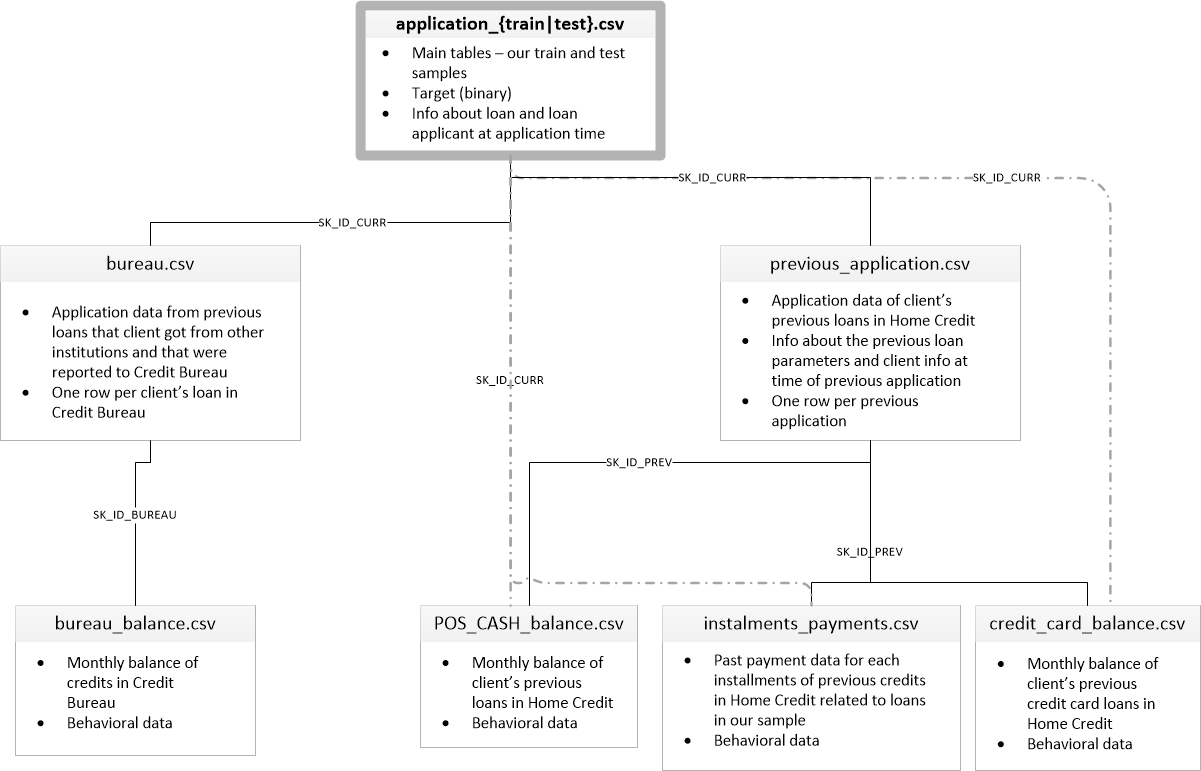

In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

pd.set_option("display.max_columns", 999)
pd.get_option("display.max_columns")

pd.set_option("display.max_rows", 999)
pd.get_option("display.max_rows")

999

In [2]:
#Previous loan history
previous_applications = pd.read_csv('previous_application.csv')

In [4]:
previous_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [4]:
#Loan installment information
installment_payment = pd.read_csv('installments_payments.csv')

In [5]:
#POS Cash Balance
pos_cash_balance = pd.read_csv('POS_CASH_balance.csv')

In [7]:
pos_cash_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [7]:
#POS Cash Balance
credit_card_balance = pd.read_csv('credit_card_balance.csv')

In [8]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [9]:
pos_cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [13]:
def missing(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing(pos_cash_balance)

,Total,Percent
CNT_INSTALMENT_FUTURE,26087,0.260835
CNT_INSTALMENT,26071,0.260675
SK_DPD_DEF,0,0.000000
SK_DPD,0,0.000000
NAME_CONTRACT_STATUS,0,0.000000
MONTHS_BALANCE,0,0.000000
SK_ID_CURR,0,0.000000
SK_ID_PREV,0,0.000000


In [16]:
pos_cash_balance[pos_cash_balance["CNT_INSTALMENT"].isnull()].head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
709,1889585,403422,-6,NaN,NaN,Signed,0,0
759,1618886,382448,-2,NaN,NaN,Signed,0,0
1887,2288203,429576,-6,NaN,NaN,Signed,0,0
1899,2110224,167171,-6,NaN,NaN,Signed,0,0
1910,2031967,235187,-5,NaN,NaN,Signed,0,0


In [18]:
pos_cash_balance[pos_cash_balance["SK_ID_PREV"]==1889585]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
709,1889585,403422,-6,NaN,NaN,Signed,0,0
631131,1889585,403422,-3,18.0,16.0,Active,0,0
854665,1889585,403422,-5,18.0,18.0,Active,0,0
6513027,1889585,403422,-4,18.0,17.0,Active,0,0
8620483,1889585,403422,-1,18.0,14.0,Active,0,0
9084418,1889585,403422,-2,18.0,15.0,Active,0,0


In [19]:
pos_cash_balance["SK_ID_PREV"].nunique()

936325

In [24]:
pos_cash_balance[pos_cash_balance["SK_DPD"]> 10]
#.value_counts()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
285,1976259,193175,-25,24.0,12.0,Active,18,18
693,1849211,290801,-31,12.0,1.0,Active,12,12
1143,1465776,256423,-41,12.0,3.0,Active,13,13
1312,2270633,274147,-3,24.0,17.0,Active,16,0
1831,1944356,235760,-27,10.0,1.0,Active,23,0
...,...,...,...,...,...,...,...,...
10001352,2700641,448867,-19,6.0,0.0,Active,843,0
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0


In [30]:
#2700641
pos_cash_balance[pos_cash_balance["SK_ID_PREV"]== 1465776].sort_values("MONTHS_BALANCE")

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
5621043,1465776,256423,-50,12.0,12.0,Active,0,0
4945139,1465776,256423,-49,12.0,11.0,Active,0,0
4195167,1465776,256423,-48,12.0,10.0,Active,0,0
4040910,1465776,256423,-47,12.0,9.0,Active,0,0
3634300,1465776,256423,-46,12.0,8.0,Active,0,0
2573285,1465776,256423,-45,12.0,7.0,Active,0,0
583696,1465776,256423,-44,12.0,6.0,Active,0,0
268321,1465776,256423,-43,12.0,5.0,Active,0,0
1993278,1465776,256423,-42,12.0,4.0,Active,0,0
1143,1465776,256423,-41,12.0,3.0,Active,13,13


In [ ]:
#SK_DPD	DPD (days past due) during the month of previous credit
#SK_DPD_DEF	DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit


In [51]:
def get_latest_record(customer_data):
    
    latest_month = max(customer_data["MONTHS_BALANCE"])
    latest_dataframe = customer_data[customer_data["MONTHS_BALANCE"]== latest_month]
    latest_dataframe["NBR_OF_DPD"] = customer_data[customer_data["SK_DPD"] >0].shape[0]
    latest_dataframe["AVG_DAYS_DPD"] = customer_data["SK_DPD"].mean()
    latest_dataframe["MAX_DAYS_DPD"] = max(customer_data["SK_DPD"])
    latest_dataframe["NBR_OF_DPD_DEF"] = customer_data[customer_data["SK_DPD_DEF"] >0].shape[0]
    latest_dataframe["AVG_DAYS_DPD_DEF"] = customer_data["SK_DPD_DEF"].mean()
    latest_dataframe["MAX_DAYS_DPD_DEF"] = max(customer_data["SK_DPD_DEF"])
    latest_dataframe = latest_dataframe.drop("SK_ID_PREV", axis =1)
    
    return latest_dataframe 

In [52]:
latest_pos_cash_balance  = pos_cash_balance.groupby("SK_ID_PREV").apply(lambda loan_prev_data: get_latest_record(loan_prev_data))

In [53]:
latest_pos_cash_balance.head()

,,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,NBR_OF_DPD,AVG_DAYS_DPD,MAX_DAYS_DPD,NBR_OF_DPD_DEF,AVG_DAYS_DPD_DEF,MAX_DAYS_DPD_DEF
SK_ID_PREV,,,,,,,,,,,,,,
1000001,45995,158271,-8,2.0,0.0,Completed,0,0,0,0.0,0,0,0.0,0
1000002,2792302,101962,-50,4.0,0.0,Completed,0,0,0,0.0,0,0,0.0,0
1000003,7085917,252457,-1,12.0,9.0,Active,0,0,0,0.0,0,0,0.0,0
1000004,4078063,260094,-22,7.0,0.0,Completed,0,0,0,0.0,0,0,0.0,0
1000005,7852623,176456,-46,10.0,0.0,Completed,0,0,0,0.0,0,0,0.0,0


In [54]:
latest_pos_cash_balance = latest_pos_cash_balance.reset_index()

In [55]:
latest_pos_cash_balance = latest_pos_cash_balance.drop("level_1", axis =1)

In [56]:
latest_pos_cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,NBR_OF_DPD,AVG_DAYS_DPD,MAX_DAYS_DPD,NBR_OF_DPD_DEF,AVG_DAYS_DPD_DEF,MAX_DAYS_DPD_DEF
0,1000001,158271,-8,2.0,0.0,Completed,0,0,0,0.0,0,0,0.0,0
1,1000002,101962,-50,4.0,0.0,Completed,0,0,0,0.0,0,0,0.0,0
2,1000003,252457,-1,12.0,9.0,Active,0,0,0,0.0,0,0,0.0,0
3,1000004,260094,-22,7.0,0.0,Completed,0,0,0,0.0,0,0,0.0,0
4,1000005,176456,-46,10.0,0.0,Completed,0,0,0,0.0,0,0,0.0,0


In [62]:
#2700641
pos_cash_balance[pos_cash_balance["SK_ID_PREV"]== 1000005].sort_values("MONTHS_BALANCE")

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
2426258,1000005,176456,-56,10.0,10.0,Active,0,0
1479162,1000005,176456,-55,10.0,9.0,Active,0,0
7787675,1000005,176456,-54,10.0,8.0,Active,0,0
7315793,1000005,176456,-53,10.0,7.0,Active,0,0
5521552,1000005,176456,-52,10.0,6.0,Active,0,0
3795130,1000005,176456,-51,10.0,5.0,Active,0,0
8657924,1000005,176456,-50,10.0,4.0,Active,0,0
229709,1000005,176456,-49,10.0,3.0,Active,0,0
2703957,1000005,176456,-48,10.0,2.0,Active,0,0
6387329,1000005,176456,-47,10.0,1.0,Active,0,0


In [61]:
latest_pos_cash_balance["SK_ID_PREV"].nunique()

936325

latest_pos_cash_balance.to_csv("latest_pos_cash_balance.csv", index= False)

In [63]:
missing(latest_pos_cash_balance)

,Total,Percent
CNT_INSTALMENT_FUTURE,890,0.095052
CNT_INSTALMENT,890,0.095052
MAX_DAYS_DPD_DEF,0,0.000000
AVG_DAYS_DPD_DEF,0,0.000000
NBR_OF_DPD_DEF,0,0.000000
MAX_DAYS_DPD,0,0.000000
AVG_DAYS_DPD,0,0.000000
NBR_OF_DPD,0,0.000000
SK_DPD_DEF,0,0.000000
SK_DPD,0,0.000000


# installment_payment

In [64]:
installment_payment.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [65]:
missing(installment_payment)

,Total,Percent
AMT_PAYMENT,2905,0.021352
DAYS_ENTRY_PAYMENT,2905,0.021352
AMT_INSTALMENT,0,0.000000
DAYS_INSTALMENT,0,0.000000
NUM_INSTALMENT_NUMBER,0,0.000000
NUM_INSTALMENT_VERSION,0,0.000000
SK_ID_CURR,0,0.000000
SK_ID_PREV,0,0.000000


In [70]:
pos_cash_balance[pos_cash_balance["SK_ID_PREV"]== 1944356].sort_values("MONTHS_BALANCE")

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
5799013,1944356,235760,-36,10.0,10.0,Active,0,0
1951996,1944356,235760,-35,10.0,9.0,Active,0,0
4718607,1944356,235760,-34,10.0,8.0,Active,20,0
6927212,1944356,235760,-33,10.0,7.0,Active,0,0
5001545,1944356,235760,-32,10.0,6.0,Active,0,0
5842561,1944356,235760,-31,10.0,5.0,Active,0,0
5640201,1944356,235760,-30,10.0,4.0,Active,21,0
1627818,1944356,235760,-29,10.0,3.0,Active,21,0
2869243,1944356,235760,-28,10.0,2.0,Active,22,0
1831,1944356,235760,-27,10.0,1.0,Active,23,0


In [69]:
installment_payment[installment_payment["SK_ID_PREV"]== 1944356].sort_values("NUM_INSTALMENT_NUMBER")

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
6482195,1944356,235760,1.0,1,-1074.0,-1064.0,11992.905,0.405
4680273,1944356,235760,1.0,1,-1074.0,-1086.0,11992.905,11992.500
4022862,1944356,235760,1.0,2,-1044.0,-1064.0,11992.905,11834.595
7511221,1944356,235760,1.0,2,-1044.0,-1024.0,11992.905,158.310
5066612,1944356,235760,1.0,3,-1014.0,-1024.0,11992.905,11991.690
7170623,1944356,235760,1.0,3,-1014.0,-998.0,11992.905,1.215
5946844,1944356,235760,1.0,4,-984.0,-963.0,11992.905,1.620
5388879,1944356,235760,1.0,4,-984.0,-998.0,11992.905,4498.785
5626329,1944356,235760,1.0,4,-984.0,-977.0,11992.905,7492.500
6123449,1944356,235760,1.0,5,-954.0,-932.0,11992.905,2.025


In [3]:
#POS Cash Balance
latest_pos_cash_balance = pd.read_csv('latest_pos_cash_balance.csv')

In [4]:
def missing(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing(latest_pos_cash_balance)

,Total,Percent
CNT_INSTALMENT_FUTURE,890,0.095052
CNT_INSTALMENT,890,0.095052
MAX_DAYS_DPD_DEF,0,0.000000
AVG_DAYS_DPD_DEF,0,0.000000
NBR_OF_DPD_DEF,0,0.000000
MAX_DAYS_DPD,0,0.000000
AVG_DAYS_DPD,0,0.000000
NBR_OF_DPD,0,0.000000
SK_DPD_DEF,0,0.000000
SK_DPD,0,0.000000


In [8]:
latest_pos_cash_balance[latest_pos_cash_balance.CNT_INSTALMENT.isnull()]["NAME_CONTRACT_STATUS"].value_counts()

Signed                   550
Returned to the store    298
Approved                  39
Canceled                   2
Active                     1
Name: NAME_CONTRACT_STATUS, dtype: int64

In [9]:
# Values are null because of their installment completed or cancelled.
# Fill the null values to 0
latest_pos_cash_balance = latest_pos_cash_balance.fillna(0)

In [10]:
missing(latest_pos_cash_balance)

,Total,Percent
MAX_DAYS_DPD_DEF,0,0.0
AVG_DAYS_DPD_DEF,0,0.0
NBR_OF_DPD_DEF,0,0.0
MAX_DAYS_DPD,0,0.0
AVG_DAYS_DPD,0,0.0
NBR_OF_DPD,0,0.0
SK_DPD_DEF,0,0.0
SK_DPD,0,0.0
NAME_CONTRACT_STATUS,0,0.0
CNT_INSTALMENT_FUTURE,0,0.0


In [11]:
#POS Cash Balance
latest_pos_cash_balance.to_csv("latest_pos_cash_balance.csv", index= False)